# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [97]:
countiries_data = pd.read_csv(os.path.join(os.path.pardir,'data','raw','Categorical.csv'))
countiries_data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
5,Aland,19.953288,60.214887,Europe
6,Andorra,1.560544,42.542291,Europe
7,United Arab Emirates,54.300167,23.905282,Asia
8,Argentina,-65.179807,-35.381349,South America
9,Armenia,44.929933,40.289526,Asia


In [128]:
count_value = countiries_data['continent'][countiries_data.Latitude > 0].value_counts()
count_value

Asia                       50
Europe                     50
North America              38
Africa                     36
Oceania                     6
South America               4
Seven seas (open ocean)     1
Name: continent, dtype: int64

In [113]:
countiries_data['count_value'] = count_value
countiries_data

,name,Longitude,Latitude,continent,count_value
0,Aruba,-69.982677,12.520880,North America,NaN
1,Afghanistan,66.004734,33.835231,Asia,NaN
2,Angola,17.537368,-12.293361,Africa,NaN
3,Anguilla,-63.064989,18.223959,North America,NaN
4,Albania,20.049834,41.142450,Europe,NaN
5,Aland,19.953288,60.214887,Europe,NaN
6,Andorra,1.560544,42.542291,Europe,NaN
7,United Arab Emirates,54.300167,23.905282,Asia,NaN
8,Argentina,-65.179807,-35.381349,South America,NaN
9,Armenia,44.929933,40.289526,Asia,NaN


In [98]:
countiries_data['continent'].value_counts()

Africa                     54
Asia                       53
Europe                     50
North America              38
Oceania                    24
South America              13
Seven seas (open ocean)     8
Antarctica                  1
Name: continent, dtype: int64

Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [60]:
mapped_countiries_data = countiries_data.copy()
mapped_countiries_data['continent'] = mapped_countiries_data['continent'].map({'North America':0,'Asia':1,'Africa':2,'Europe':3,'South America':4,'Oceania':5,'Antarctica':6,'Seven seas (open ocean)':7})
mapped_countiries_data.tail()


,name,Longitude,Latitude,continent
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,1
238,South Africa,25.083901,-29.000341,2
239,Zambia,27.774759,-13.458242,2
240,Zimbabwe,29.851441,-19.004204,2


## Select the features

In [61]:
x = mapped_countiries_data.iloc[:, 1:4]
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,0
1,66.004734,33.835231,1
2,17.537368,-12.293361,2
3,-63.064989,18.223959,0
4,20.049834,41.142450,3
5,19.953288,60.214887,3
6,1.560544,42.542291,3
7,54.300167,23.905282,1
8,-65.179807,-35.381349,4
9,44.929933,40.289526,1


In [111]:
count_value = mapped_countiries_data['continent'][mapped_countiries_data.Latitude > 0].value_counts()
count_value

3    50
1    50
0    38
2    36
5     6
4     4
7     1
Name: continent, dtype: int64

In [110]:
mapped_countiries_data['count_value'] = count_value
mapped_countiries_data

,name,Longitude,Latitude,continent,Clusters,count_value
0,Aruba,-69.982677,12.520880,0,2,38.0
1,Afghanistan,66.004734,33.835231,1,0,50.0
2,Angola,17.537368,-12.293361,2,5,36.0
3,Anguilla,-63.064989,18.223959,0,2,50.0
4,Albania,20.049834,41.142450,3,6,4.0
5,Aland,19.953288,60.214887,3,6,6.0
6,Andorra,1.560544,42.542291,3,6,NaN
7,United Arab Emirates,54.300167,23.905282,1,0,1.0
8,Argentina,-65.179807,-35.381349,4,2,NaN
9,Armenia,44.929933,40.289526,1,0,NaN


## Clustering

In [62]:
kmeans = KMeans(7)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Use 4 clusters initially.

## Clustering results

In [93]:
identified_clustered = kmeans.fit_predict(x)
mapped_countiries_data['Clusters'] = identified_clustered
mapped_countiries_data

,name,Longitude,Latitude,continent,Clusters
0,Aruba,-69.982677,12.520880,0,2
1,Afghanistan,66.004734,33.835231,1,0
2,Angola,17.537368,-12.293361,2,5
3,Anguilla,-63.064989,18.223959,0,2
4,Albania,20.049834,41.142450,3,6
5,Aland,19.953288,60.214887,3,6
6,Andorra,1.560544,42.542291,3,6
7,United Arab Emirates,54.300167,23.905282,1,0
8,Argentina,-65.179807,-35.381349,4,2
9,Armenia,44.929933,40.289526,1,0


In [92]:
mapped_countiries_data['name'].value_counts()

Tonga                    1
Qatar                    1
S. Sudan                 1
United States            1
Switzerland              1
Lesotho                  1
Niger                    1
Dem. Rep. Korea          1
Ukraine                  1
Monaco                   1
Br. Indian Ocean Ter.    1
Madagascar               1
Guyana                   1
Peru                     1
Hong Kong                1
Bosnia and Herz.         1
Denmark                  1
Dominica                 1
Slovakia                 1
Spain                    1
Brazil                   1
N. Mariana Is.           1
Luxembourg               1
Bolivia                  1
W. Sahara                1
Mexico                   1
Macao                    1
Fr. Polynesia            1
Azerbaijan               1
Slovenia                 1
                        ..
Argentina                1
Belize                   1
Palestine                1
Guam                     1
Senegal                  1
Somalia                  1
S

## Plot the data

(-90, 90)

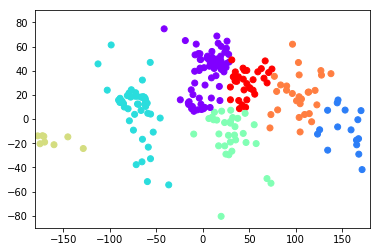

In [64]:
plt.scatter(mapped_countiries_data['Longitude'],mapped_countiries_data['Latitude'],c=mapped_countiries_data['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.